Shape dataset: (374, 13)
Kolom dataset: Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

Missing values:
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


/tmp/ipython-input-2505217972.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Quality of Sleep"], palette="Set2")


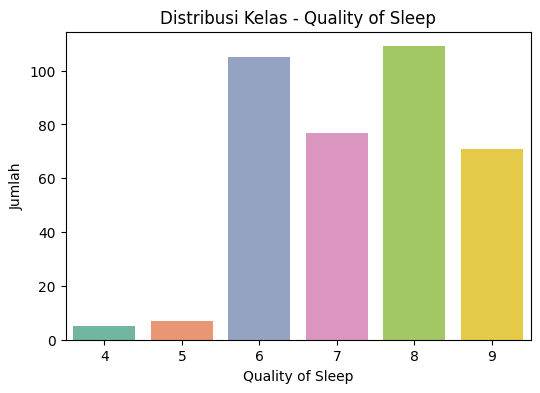

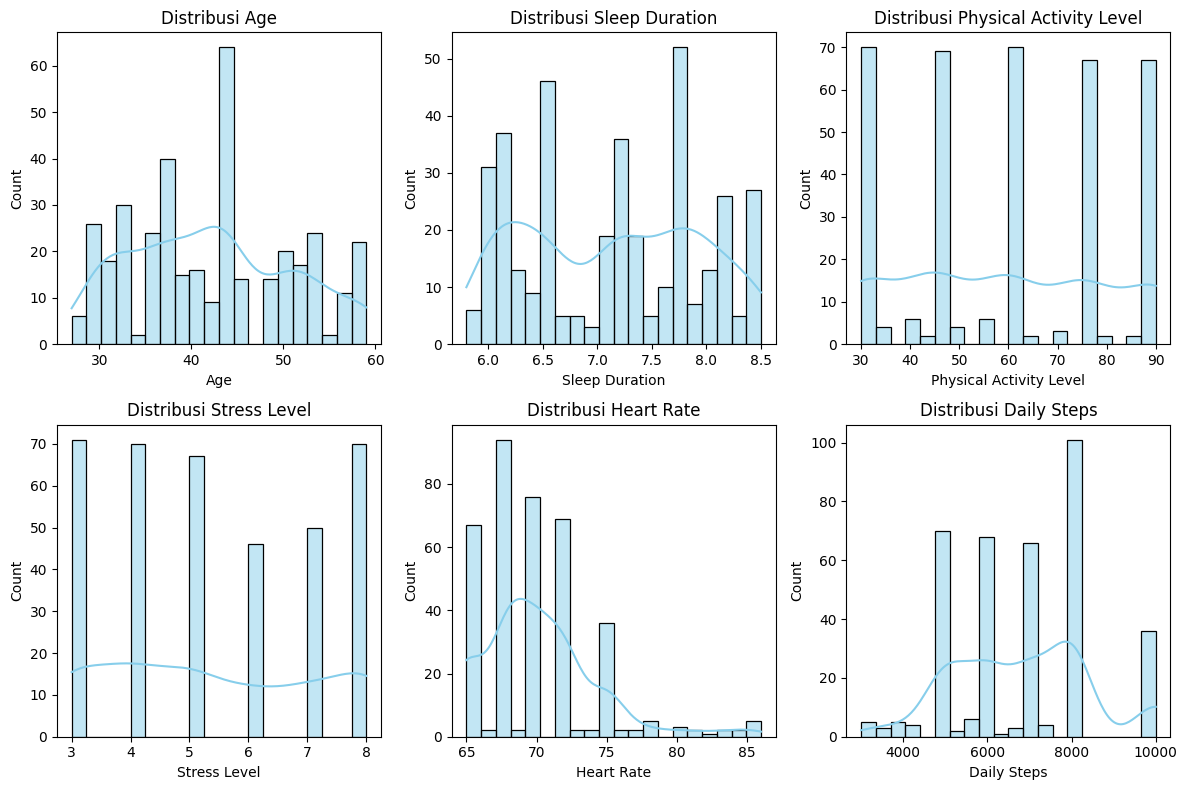

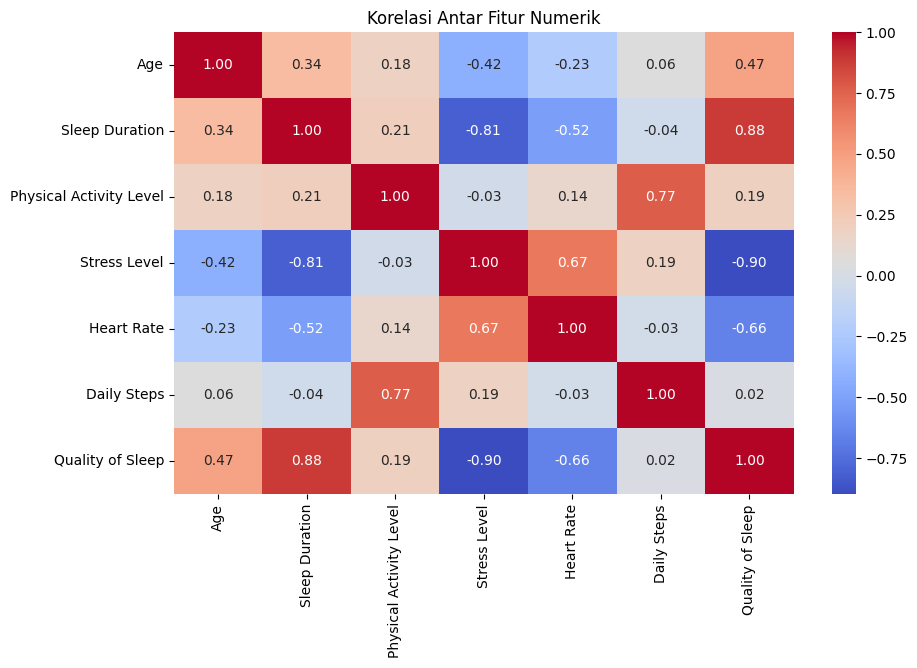


Contoh Sample Data:
   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             3              11   
1                       60             8             0               9   
2                       60             8             0               9   
3                       30             8             2              22   
4                       30             8             2              22   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               2  
1          75        10000               2  
2          75 

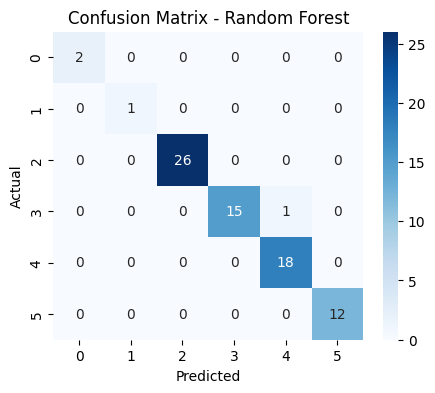

In [1]:
# ==========================================
# PREDIKSI KUALITAS TIDUR
# Logistic Regression & Random Forest
# ==========================================

# === Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ==========================================
# 1. Load Dataset
# ==========================================
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

print("Shape dataset:", df.shape)
print("Kolom dataset:", df.columns)

# ==========================================
# 2. Data Preprocessing
# ==========================================
# Hapus kolom yang tidak relevan
if "Person ID" in df.columns:
    df = df.drop(columns=["Person ID"])

# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# Encode kolom kategorikal
cat_cols = ["Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"]
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# ==========================================
# 3. Exploratory Data Analysis (EDA)
# ==========================================
# a. Distribusi label/kelas (Quality of Sleep)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Quality of Sleep"], palette="Set2")
plt.title("Distribusi Kelas - Quality of Sleep")
plt.xlabel("Quality of Sleep")
plt.ylabel("Jumlah")
plt.show()

# b. Histogram fitur numerik
num_features = ["Age", "Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# c. Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features + ["Quality of Sleep"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

# d. Contoh sample data
print("\nContoh Sample Data:")
print(df.head())

# ==========================================
# 4. Pilih Fitur & Target
# ==========================================
features = ["Age", "Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
target = "Quality of Sleep"

X = df[features]
y = df[target]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 5. Train-Test Split
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ==========================================
# 6. Modeling
# ==========================================
# Logistic Regression
logreg = LogisticRegression(
    max_iter=1000, solver='liblinear', penalty='l2', C=1.0, random_state=42
)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ==========================================
# 7. Evaluasi
# ==========================================
print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=1))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))

# Confusion Matrix untuk Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))